In [1]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras

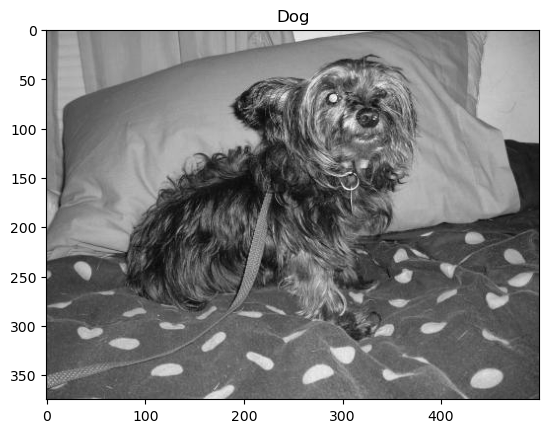

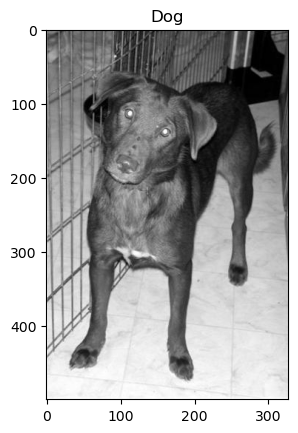

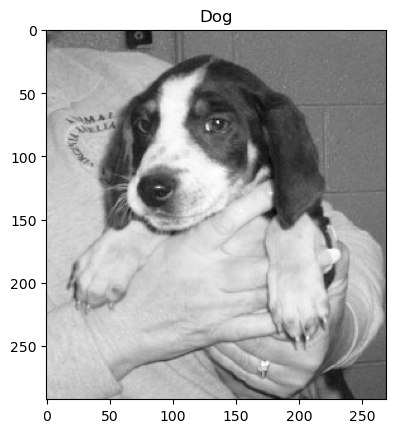

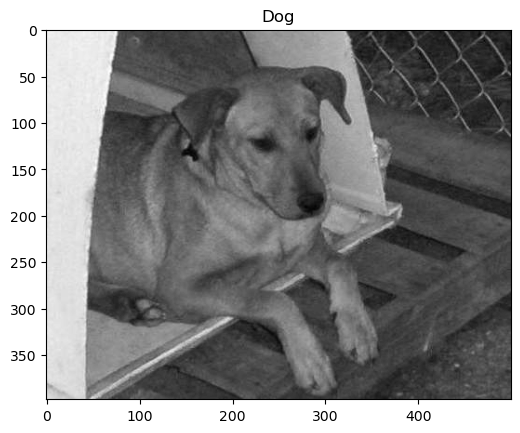

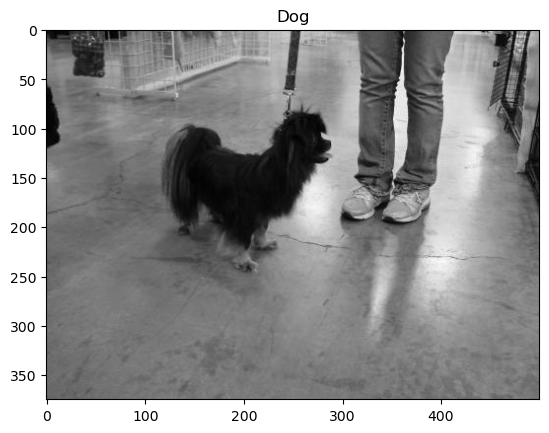

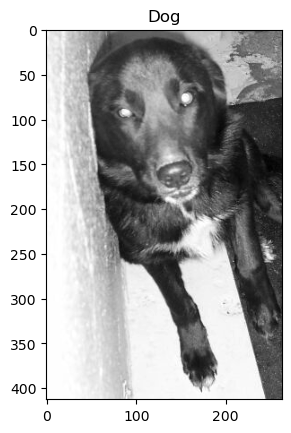

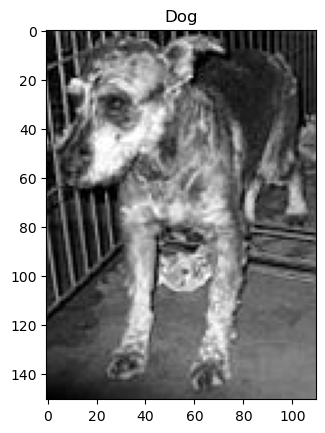

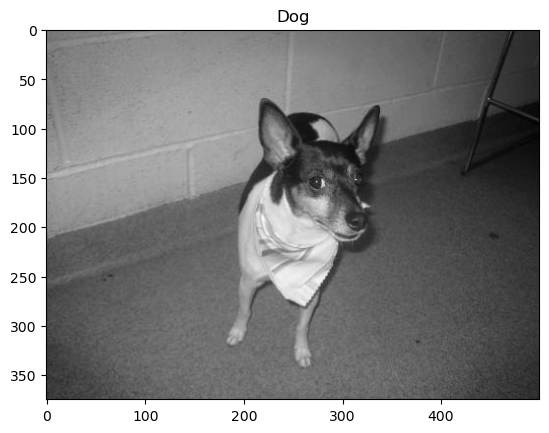

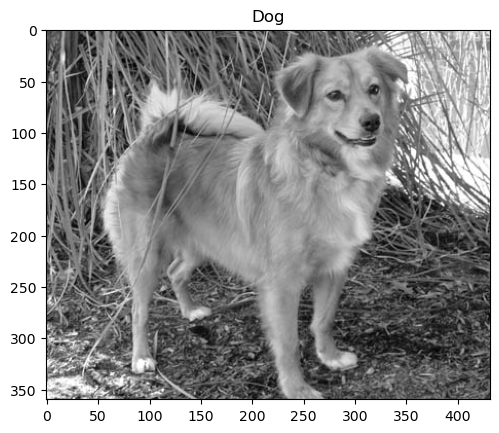

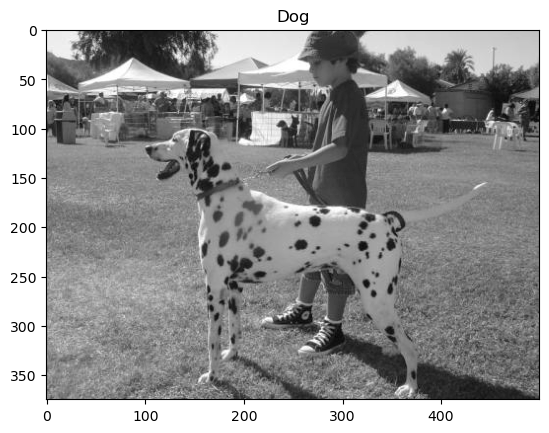

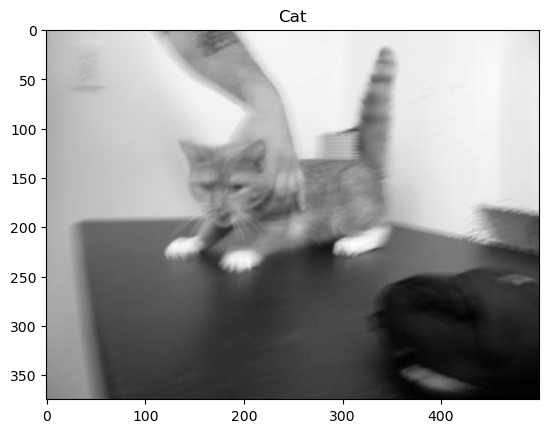

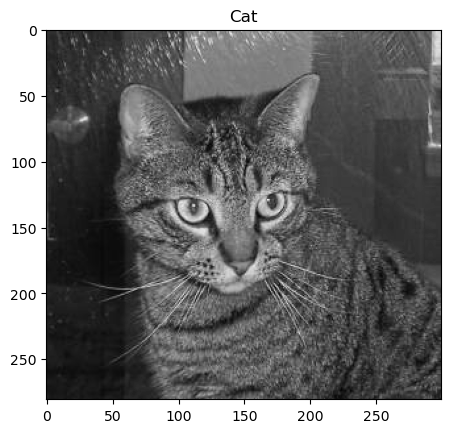

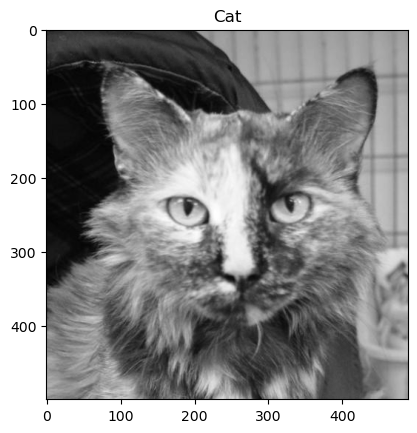

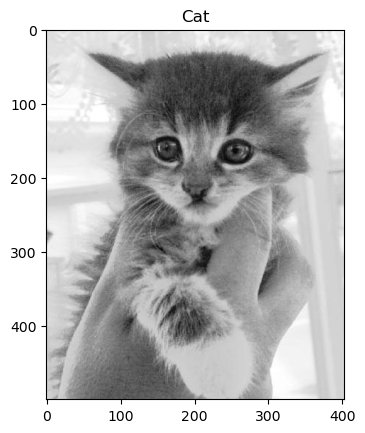

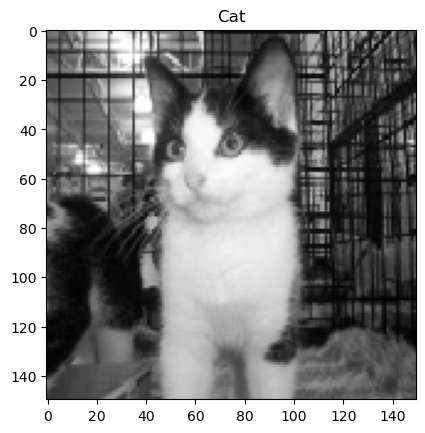

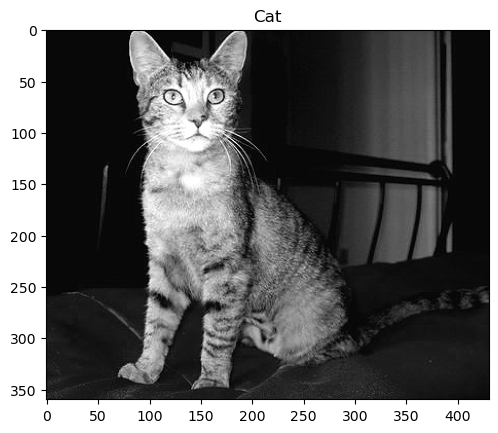

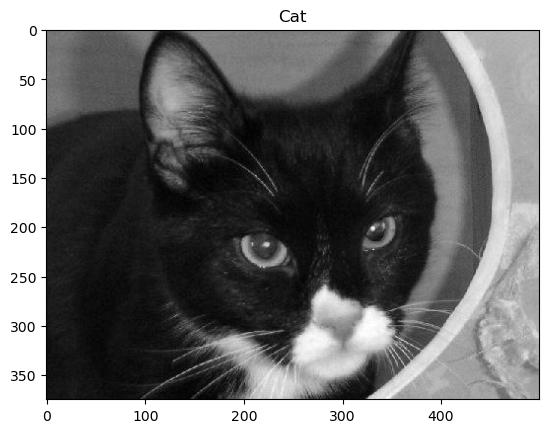

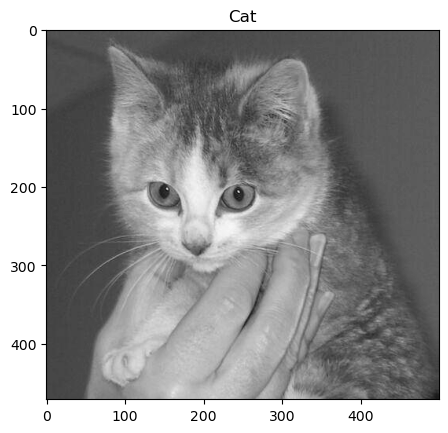

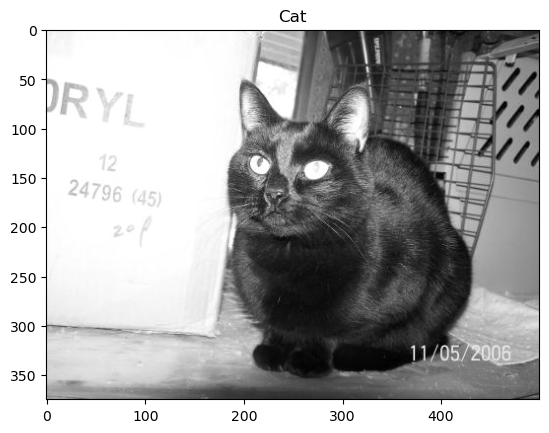

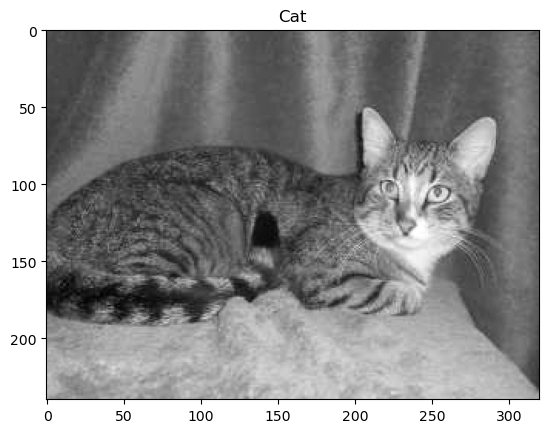

In [3]:
DATADIR = 'C:\\Users\\Hp\\Downloads\\PetImages'
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    x = 0
    for img in os.listdir(path):
        x += 1
        img_path = os.path.join(path, img)
        img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.title(category)  # إضافة اسم الفئة كعنوان
        plt.show()
        if x == 10:
            break


In [4]:
print(img_array)
print(img_array.shape)

[[ 75  80  84 ...  91  86  85]
 [ 75  79  83 ...  90  89  91]
 [ 75  78  82 ...  83  87  91]
 ...
 [180 175 170 ... 158 160 162]
 [179 169 158 ... 164 164 163]
 [180 166 149 ... 168 165 161]]
(240, 320)


# Preprocessing 

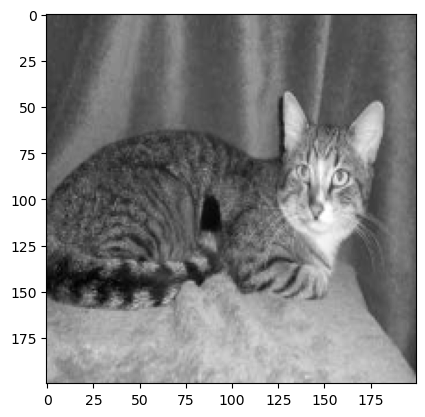

In [5]:
#IMG_SIZE = 5
#IMG_SIZE = 10
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
           

create_training_data()

print(len(training_data))

100%|██████████| 12501/12501 [00:36<00:00, 339.62it/s]

24946


In [7]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

0
0
0
1
1
0
1
1
1
0


In [8]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE)

[[[[111]
   [111]
   [111]
   ...
   [111]
   [111]
   [111]]

  [[111]
   [111]
   [111]
   ...
   [111]
   [111]
   [111]]

  [[111]
   [111]
   [111]
   ...
   [111]
   [111]
   [111]]

  ...

  [[111]
   [111]
   [111]
   ...
   [111]
   [111]
   [111]]

  [[111]
   [111]
   [111]
   ...
   [111]
   [111]
   [111]]

  [[111]
   [111]
   [111]
   ...
   [111]
   [111]
   [111]]]]


In [9]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
 
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

# Built Model

In [11]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
import numpy as np
y_test = np.array(y_test)

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE)),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(64, activation=tf.nn.sigmoid),  # Additional layer
    keras.layers.Dense(32, activation=tf.nn.sigmoid),  # Additional layer
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy'
              ,metrics=['accuracy'])

In [15]:
import numpy as np
y = np.array(y)

In [16]:
model.fit(X, y, epochs=3)

Epoch 1/3
780/780 [==============================] - 27s 32ms/step - loss: 0.6956 - accuracy: 0.4980
Epoch 2/3
780/780 [==============================] - 27s 35ms/step - loss: 0.6945 - accuracy: 0.4991
Epoch 3/3
780/780 [==============================] - 28s 36ms/step - loss: 0.6945 - accuracy: 0.4992


In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

156/156 [==============================] - 3s 16ms/step - loss: 0.6936 - accuracy: 0.5046
Test accuracy: 0.504609227180481


In [18]:
import numpy as np
output = model.predict(X_test)
y_pred = np.argmax(output,axis = 1)

156/156 [==============================] - 2s 12ms/step


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67      4990

    accuracy                           0.50      4990
   macro avg       0.50      0.25      0.34      4990
weighted avg       1.00      0.50      0.67      4990



C:\Users\Hp\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
model.save('model.h5')